# Data Handling and Visualization
### Assignment 3 - Matplotlib
## Population vs GDP
Mahrukh Shabbir Hasan                                                                                                           
Student ID: 20047638
_______________________________________________________________________________________________________________________________


## Brief Overview
This assignemnt aims at visually analysing the world bank data particularly the Economy(GDP) of selected countries versus its population statistics.

#### Importing Data For Visualisation
Importing data from WBGAPI as was done in the previous assignment. The list of country_codes, Country_groups and country_names are defined, the indicators for the data are defiend and then the data is imported into two different dataframes - one for GDP and the other for population.

In [1]:
#Importing necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import wbgapi as wb

# List of country codes of the selected countries
country_codes = ['DEU','FRA','ESP','GBR','USA','IND','ARE','AUS','CHN','BWA']

# Names of the countries selected
country_names = {'DEU':'Germany','FRA':'France','ESP':'Spain','GBR':'United Kingdom', 'USA':'United States',
                'IND':'India', 'ARE': 'United Arab Emirates', 'AUS': 'Australia', 'CHN': 'China', 'BWA': 'Botswana'}

# Continents of the countries selected
country_groups = {'DEU':'Europe','FRA':'Europe','ESP':'Europe','GBR':'Europe', 'USA':'United States',
                'IND':'Asia', 'ARE': 'Asia', 'AUS': 'Australia', 'CHN': 'Asia', 'BWA': 'Africa'}

#Population size of the selected countries
pop_size = {'DEU':'Large','FRA':'Medium','ESP':'Small','GBR':'Medium', 'USA':'Large',
            'IND':'Large', 'ARE': 'Small', 'AUS': 'Medium', 'CHN': 'Large', 'BWA': 'Small'}


In [2]:
# Popolution Statistics Indicators 
#SP.POP.TOTL- total population
#SP.URB.TOTL.IN.ZS - urban population
#SP.RUR.TOTL.ZS - rural population
#AG.LND.TOTL.K2 - land area per sq KM
indicators_pop = ['SP.URB.TOTL.IN.ZS', 'SP.RUR.TOTL.ZS', 'SP.POP.TOTL', 'AG.LND.TOTL.K2']

# GDP of countries Indicators
#NY.GDP.PCAP.CD - GDP per capita
#GC.XPN.TOTL.GD.ZS - expense % GDP
#NE.EXP.GNFS.ZS - % export of goods and services
#NE.IMP.GNFS.ZS - Imports 
indicators_GDP = ['NY.GDP.PCAP.CD', 'GC.XPN.TOTL.GD.ZS','NE.EXP.GNFS.ZS', 'NE.IMP.GNFS.ZS']

In [3]:
# Importing population data from WBGAPI
df_pop  = wb.data.DataFrame(indicators_pop ,country_codes, columns = 'series', mrv=5) 
# Creating MultiIndex data frame - defining the columns
df_pop.columns = pd.MultiIndex.from_tuples([('Population','Urban'),('Population', 'Rural'), 
                                           ('Population', 'Total in Bln'), ('Land', 'Land Area')])
# Defining the Indeces
df_pop.index.names = ['Country', 'Years']
# Remove the YR from Year index
df_pop.reset_index(inplace=True)
df_pop['Years'] = df_pop['Years'].str.lstrip('YR')
df_pop = df_pop.set_index(['Country', 'Years'])

# Displaying final Dataframe for Population statistics 
df_pop

Population                                 Land
                     Urban         Rural Total in Bln Land Area
Country Years                                                  
ARE     2017     71020.000  9.487206e+06       13.752    86.248
        2018     71020.000  9.630966e+06       13.478    86.522
        2019     71020.000  9.770526e+06       13.211    86.789
        2020     71020.000  9.890400e+06       12.952    87.048
        2021     71020.000           NaN          NaN       NaN
AUS     2017   7692020.000  2.460186e+07       14.096    85.904
        2018   7692020.000  2.498269e+07       13.988    86.012
        2019   7692020.000  2.536574e+07       13.876    86.124
        2020   7692020.000  2.569327e+07       13.759    86.241
        2021   7692020.000           NaN          NaN       NaN
BWA     2017    566730.000  2.205076e+06       31.300    68.700
        2018    566730.000  2.254067e+06       30.554    69.446
        2019    566730.000  2.303703e+06       29.828    70.172
        2020    566730.000  2.351625e+06       29.123    70.877
        2021    566730.000           NaN          NaN       NaN
CHN     2017   9424700.800  1.396215e+09       42.040    57.960
        2018   9424702.900  1.402760e+09       40.848    59.152
        2019   9424702.900  1.407745e+09       39.692    60.308
        2020   9424702.900  1.410929e+09       38.572    61.428
        2021   9424702.900           NaN          NaN       NaN
DEU     2017    349370.000  8.265700e+07       22.739    77.261
        2018    349380.000  8.290578e+07       22.688    77.312
        2019    349380.000  8.309296e+07       22.624    77.376
        2020    349380.000  8.316087e+07       22.547    77.453
        2021    349380.000           NaN          NaN       NaN
ESP     2017    499547.350  4.659324e+07       19.920    80.080
        2018    499603.479  4.679775e+07       19.679    80.321
        2019    499603.479  4.713484e+07       19.435    80.565
        2020    499603.479  4.736342e+07       19.190    80.810
        2021    499603.479           NaN          NaN       NaN
FRA     2017    547557.000  6.691802e+07       19.820    80.180
        2018    547557.000  6.710193e+07       19.556    80.444
        2019    547557.000  6.724893e+07       19.291    80.709
        2020    547557.000  6.737991e+07       19.025    80.975
        2021    547557.000           NaN          NaN       NaN
GBR     2017    241930.000  6.605886e+07       16.857    83.143
        2018    241930.000  6.646034e+07       16.602    83.398
        2019    241930.000  6.683633e+07       16.348    83.652
        2020    241930.000  6.721529e+07       16.097    83.903
        2021    241930.000           NaN          NaN       NaN
IND     2017   2973190.000  1.338677e+09       66.400    33.600
        2018   2973190.000  1.352642e+09       65.970    34.030
        2019   2973190.000  1.366418e+09       65.528    34.472
        2020   2973190.000  1.380004e+09       65.074    34.926
        2021   2973190.000           NaN          NaN       NaN
USA     2017   9147420.000  3.251221e+08       17.942    82.058
        2018   9147420.000  3.268382e+08       17.744    82.256
        2019   9147420.000  3.283300e+08       17.541    82.459
        2020   9147420.000  3.315011e+08       17.336    82.664
        2021   9147420.000           NaN          NaN       NaN

In [4]:
# Importing GDP data from WBGAPI
df_gdp = wb.data.DataFrame(indicators_GDP, country_codes, columns = 'series', mrv = 5)
# Creating MultiIndex data frame - defining the columns
df_gdp.columns = pd.MultiIndex.from_tuples([('GDP','Per Capita'),('GDP', 'Expense'), 
                                           ('Imp/Exp', 'Exports'), ('Imp/Exp', 'Imports')])
# Defining the Indeces
df_gdp.index.names = ['Country', 'Years']
# Remove the YR from Year index
df_gdp.reset_index(inplace=True)
df_gdp['Years'] = df_gdp['Years'].str.lstrip('YR')
df_gdp = df_gdp.set_index(['Country', 'Years'])

# Displaying the final Economic/GDP statistics DataFrame
df_gdp

GDP                Imp/Exp              
              Per Capita     Expense    Exports       Imports
Country Years                                                
ARE     2016    4.465958  101.003014  75.744634  38141.867131
        2017    4.066428   99.594938  75.409412  40644.791190
        2018    3.963114   93.048123  66.680651  43839.324487
        2019    4.267227   96.843533  70.850619  42701.443045
        2020         NaN         NaN        NaN  36284.555243
AUS     2016   26.986857   19.269863  21.547899  49881.763714
        2017   26.608724   21.225319  20.714438  53934.250175
        2018   26.215527   21.869713  21.512513  57180.779400
        2019   26.190046   24.169727  21.675312  54875.285956
        2020         NaN   23.983854  20.055673  51680.316523
BWA     2016   26.781141   54.611351  45.853318   6982.917492
        2017   28.184288   42.964736  39.044533   7296.092142
        2018   29.266589   44.535787  43.527645   7503.878588
        2019   29.029884   37.383152  46.371478   7203.064221
        2020         NaN   31.079255  46.060211   6404.899932
CHN     2016         NaN   19.584380  17.310035   8094.363367
        2017         NaN   19.692277  17.940136   8816.986905
        2018         NaN   19.112104  18.453681   9905.342004
        2019         NaN   18.409992  17.480104  10143.838172
        2020         NaN   18.496911  16.009977  10434.775187
DEU     2016   27.902920   46.073263  38.696383  42136.120791
        2017   28.076617   47.163041  40.074162  44652.589172
        2018   27.898428   47.301046  41.133361  47973.607624
        2019   28.327925   46.624239  40.975427  46794.899292
        2020         NaN   43.416895  37.691652  46252.689304
ESP     2016         NaN   33.880090  29.892534  26523.348222
        2017   31.742962   35.149462  31.543111  28170.167864
        2018   32.165643   35.162588  32.445550  30364.579944
        2019   32.260693   34.954656  32.024671  29554.490517
        2020         NaN   30.620938  29.147786  27056.421751
FRA     2016   47.881926   30.247537  30.852605  37062.533572
        2017   47.707991   30.948633  32.013214  38781.049487
        2018   46.753912   31.713667  32.724285  41592.795896
        2019   46.261766   31.592055  32.549418  40578.644285
        2020         NaN   27.873644  29.893784  39037.122631
GBR     2016   37.269009   28.220781  29.858507  41499.555703
        2017   36.742940   30.045686  31.309071  40857.755583
        2018   36.485435   30.506397  31.807826  43646.951971
        2019   36.205611   31.004978  31.922291  43070.498360
        2020         NaN   28.120834  27.988020  41059.168809
IND     2016   15.271950   19.158235  20.924251   1732.554242
        2017   15.614110   18.791765  21.950732   1980.667020
        2018   15.673674   19.941241  23.657416   1996.915087
        2019         NaN   18.429387  20.957385   2100.751461
        2020         NaN   18.663180  19.207818   1927.707823
USA     2016   22.547553   11.907714  14.608418  58021.400500
        2017   22.273517   12.197516  14.960314  60109.655726
        2018   22.302949   12.291520  15.183961  63064.418410
        2019   22.658365   11.756173  14.538130  65279.529026
        2020   32.987982   10.134143  13.241985  63206.521077

#### Plotting the Graphs Using Matplotlib library

Text(0.5, 1.0, 'Total Population over the years')

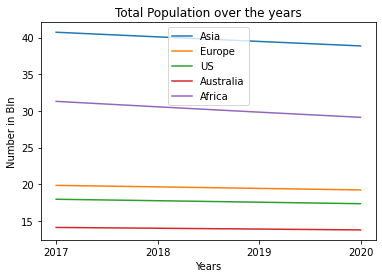

In [5]:
# Graph 1: Plotting the total population over the years for each continent
country_groups = {'DEU':'Europe','FRA':'Europe','ESP':'Europe','GBR':'Europe', 'USA':'United States',
                'IND':'Asia', 'ARE': 'Asia', 'AUS': 'Australia', 'CHN': 'Asia', 'BWA': 'Africa'}
pop_years = df_pop.droplevel(level = 0, axis = 1)
pop_years = pop_years.reset_index()
pop_years['Continents'] = pop_years['Country'].map(country_groups)
cont_pop = pop_years.groupby(['Continents', 'Years']).mean()
plt.figure()
# dividing the population on continents
cont_pop = cont_pop.reset_index()
asia = cont_pop[cont_pop['Continents'] == 'Asia']
europe = cont_pop[cont_pop['Continents'] == 'Europe']
US = cont_pop[cont_pop['Continents'] == 'United States']
Australia = cont_pop[cont_pop['Continents'] == 'Australia']
Africa = cont_pop[cont_pop['Continents'] == 'Africa']

# Plotting the data continent-wise
plt.plot(asia["Years"], asia["Total in Bln"], label = "Asia")
plt.plot(europe["Years"], europe["Total in Bln"], label = "Europe")
plt.plot(US["Years"], US["Total in Bln"], label = "US")
plt.plot(Australia["Years"], Australia["Total in Bln"], label = "Australia")
plt.plot(Africa["Years"], Africa["Total in Bln"], label = "Africa")
plt.legend()
plt.xlabel('Years')
plt.ylabel('Number in Bln')
plt.title('Total Population over the years')

Text(0, 0.5, '% GDP')

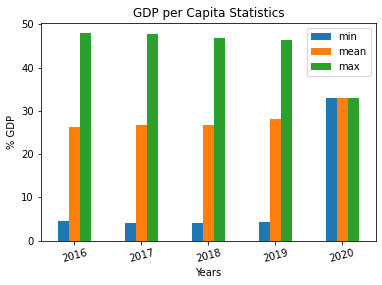

In [6]:
# Graph 2: GDP per capita over the years for selected countries
gdp_year = df_gdp.droplevel(level = 0, axis = 1).groupby('Years').agg([min, np.mean, max])['Per Capita']
gdp_year.plot.bar(rot = 15, title = "GDP per Capita Statistics")
plt.ylabel("% GDP")


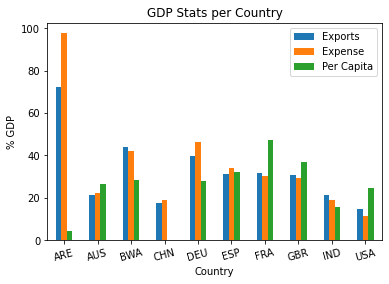

In [7]:
# Graph 3: GDP stats per country - BAR PLOT
exp_imp_con = df_gdp.droplevel(level = 0, axis = 1).groupby('Country').mean()[['Exports', 'Expense', 'Per Capita']]
gdp_stats = exp_imp_con.plot.bar(rot = 15, title = "GDP Stats per Country")
plt.ylabel("% GDP")
plt.show(block = True)

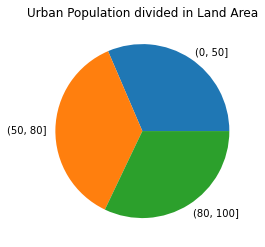

In [8]:
# Graph 4: Urban population in land categories
df_pop1 = df_pop.droplevel(level = 0, axis = 1)
land = pd.cut(df_pop1['Land Area'], [0, 50, 80, 100])  
diff = df_pop1.pivot_table(['Urban','Rural', 'Total in Bln'], [land])
diff = diff.reset_index()
# Plot Pie chart for the land division
plt.pie(x = diff['Urban'],labels = diff['Land Area'])
plt.title('Urban Population divided in Land Area')
# show plot
plt.show()

Text(0.5, 1.0, 'Rural Population divided in Land Area')

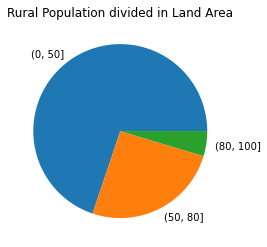

In [9]:
# Graph 5: Rural population in land categories
plt.pie(x = diff['Rural'],labels = diff['Land Area'])
plt.title('Rural Population divided in Land Area')

      continents       Imports
0         Africa   7078.170475
1           Asia  17249.725491
2      Australia  53510.479154
3         Europe  38833.249539
4  United States  61936.304948


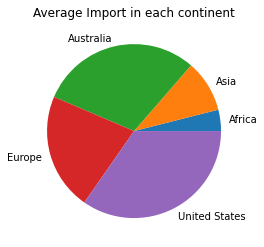

In [10]:
# Graph 6: Average Imports in all continents over the years
# Continents of the countries selected
country_groups = {'DEU':'Europe','FRA':'Europe','ESP':'Europe','GBR':'Europe', 'USA':'United States',
                'IND':'Asia', 'ARE': 'Asia', 'AUS': 'Australia', 'CHN': 'Asia', 'BWA': 'Africa'}
df_gdp1 = df_gdp.droplevel(level = 0, axis = 1)
imp_cont = df_gdp1.droplevel(level = 1).groupby(country_groups).mean()['Imports']
imp_cont = pd.DataFrame(imp_cont)
imp_cont = imp_cont.reset_index()
imp_cont.columns = ['continents','Imports']
print(imp_cont)
# Plotting the graph
plt_imp = plt.pie(x = imp_cont['Imports'], labels = imp_cont['continents'])
plt.title('Average Import in each continent')
# show plot
plt.show()

         Per Capita    Expense    Exports
Country                                  
ARE        4.190682  97.622402  72.171329
AUS       26.500288  22.103695  21.101167
BWA       28.315476  42.114856  44.171437
DEU       28.051473  46.115697  39.714197
ESP       32.056433  33.953547  31.010730
FRA       47.151399  30.475107  31.606661
GBR       36.675749  29.579735  30.577143
IND       15.519911  18.996761  21.339520
USA       24.554073  11.657413  14.506561


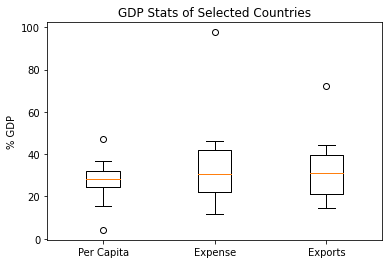

In [11]:
# Graph 7: GDP statistics per country - BOX PLOT
df_temp = df_gdp.droplevel(level = 0, axis = 1)
df_temp = df_temp.reset_index()
gdp_Cont = df_temp.groupby('Country').mean()[['Per Capita','Expense', 'Exports']]
gdp_Cont = gdp_Cont.dropna()
print(gdp_Cont)
# Plot the BOX plot 
plt.boxplot((gdp_Cont['Per Capita'], gdp_Cont['Expense'], gdp_Cont['Exports']), labels=['Per Capita','Expense','Exports'])
plt.ylabel('% GDP')
plt.title('GDP Stats of Selected Countries')
plt.show()

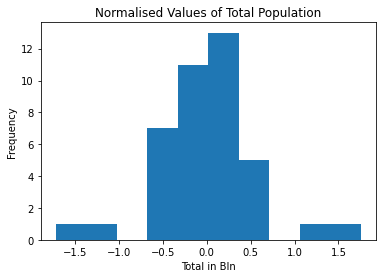

In [12]:
# Graph 8: Normalised values of Total Population
hist_plot = df_pop.groupby('Country').transform(lambda x: x - x.mean())
hist_plot = hist_plot.droplevel(level = 0, axis = 1)
hist_plot = hist_plot.reset_index()
plt.hist(hist_plot['Total in Bln'])
plt.ylabel('Frequency')
plt.xlabel('Total in Bln')
plt.title('Normalised Values of Total Population')
plt.show()

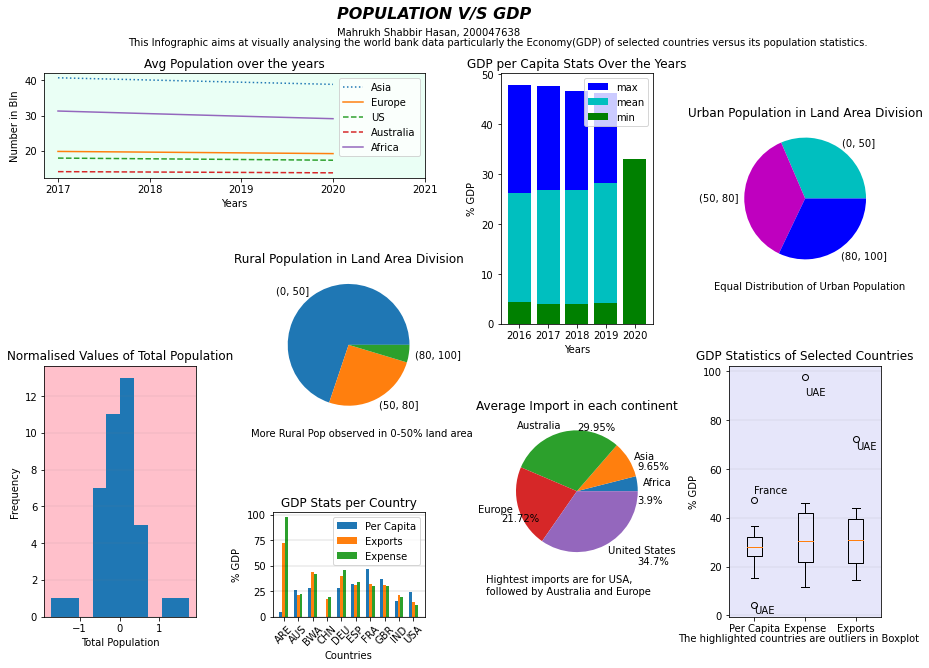

<Figure size 720x432 with 0 Axes>

In [13]:
## Combining all the plots

# Colour of the background of dashboard infographics
plt.rcParams['savefig.facecolor'] = "#ffffcb"
# Figure size
fig = plt.figure(figsize = (15, 10))
# Font style of the Title
font_dict = {'fontstyle' :'italic',
             'fontsize': 16,
             'fontweight': 'bold',
             'color': 'black'}

# Creating the gridspace
plt.text(x = 0.35, y = 1.1, s = 'POPULATION V/S GDP', fontdict = font_dict)
plt.text(x = 0.35, y = 1.07, s = 'Mahrukh Shabbir Hasan, 200047638')
plt.text(x = 0.10, y = 1.05, s = 'This Infographic aims at visually analysing the world bank data particularly')
plt.text(x = 0.553, y = 1.05, s= 'the Economy(GDP) of selected countries versus its population statistics.')
plt.axis('off')
grid = plt.GridSpec(4,4, wspace = 0.5, hspace = 0.4)

# Defining the positions of the Subplots 
## The subplots are added in a sequence to outlie the GDP-Population Stats
ax11 = fig.add_subplot(grid[0,0:2])     #Avg Population over the years
ax12 = fig.add_subplot(grid[0:2,2:3])   #GDP per Capita Stats Over the Years
ax13 = fig.add_subplot(grid[0:2,3:4])   #Urban Population in Land Area Division
ax20 = fig.add_subplot(grid[1:3,1])     #Rural Population in Land Area Division
ax30 = fig.add_subplot(grid[2:4,0])     #Normalised Values of Total Population
ax31 = fig.add_subplot(grid[3:4,1:2])   #GDP Stats per Country
ax32 = fig.add_subplot(grid[2:4,2:3])   #Average Import in each continent
ax33 = fig.add_subplot(grid[2:4,3:4])   #GDP Statistics of Selected Countries

## Plotting graphs in each subplots
# Graph 1: Plotting the average total population over the years for continents
ax11.plot(asia["Years"], asia["Total in Bln"], label = "Asia", linestyle='dotted')
ax11.plot(europe["Years"], europe["Total in Bln"], label = "Europe")
ax11.plot(US["Years"], US["Total in Bln"], label = "US", linestyle='dashed')
ax11.plot(Australia["Years"], Australia["Total in Bln"], label = "Australia" , linestyle='dashed')
ax11.plot(Africa["Years"], Africa["Total in Bln"], label = "Africa")
ax11.legend()
ax11.set_facecolor('#eafff5') # colour of graph
ax11.set_xticks(asia["Years"])
ax11.set_xlabel('Years')
ax11.set_ylabel('Number in Bln')
ax11.set_title('Avg Population over the years')

# Graph 2: Plotting the GDP per capita stats over the years
gdp_year1 = gdp_year.reset_index()
ax12.bar(gdp_year1['Years'], gdp_year1['max'], label='max', color = 'b')
ax12.bar(gdp_year1['Years'], gdp_year1['mean'], label='mean', color = 'c')
ax12.bar(gdp_year1['Years'], gdp_year1['min'], label='min', color = 'g')
ax12.set_xlabel('Years')
ax12.set_ylabel('% GDP')
ax12.set_xticks(gdp_year1["Years"])
ax12.set_title('GDP per Capita Stats Over the Years')
ax12.legend()

# Graph 3: Plotting the division of land area based on the Urban population
ax13.pie(x = diff['Urban'],labels = diff['Land Area'], colors = ['c','m','b'])
ax13.set_title('Urban Population in Land Area Division')
# Adding text 
ax13.text(x = -1.5, y = -1.5, s = 'Equal Distribution of Urban Population')

# Graph 4: Plotting the division of land area based on the Rural population
plt.figure(figsize = (10,6))
ax20.pie(x = diff['Rural'],labels = diff['Land Area'])
ax20.set_title('Rural Population in Land Area Division')
# Adding text 
ax20.text(x = -1.6, y = -1.5, s = 'More Rural Pop observed in 0-50% land area')


# Graph 5: Plotting the histogram of the Normalised total population
ax30.hist(hist_plot['Total in Bln'])
ax30.set_ylabel('Frequency')
ax30.set_xlabel('Total Population')
ax30.set_facecolor('#ffc0cb')
ax30.grid(color='grey', axis='y', linestyle='-', linewidth=0.25, alpha=0.5)
ax30.set_title('Normalised Values of Total Population')

# Graph 6: Plotting the Export Vs Expense Stats per country
a = exp_imp_con.reset_index()
width = 0.2
x = np.arange(len(a['Country']))
ax31.bar(x - width, a['Per Capita'], width, label='Per Capita')
ax31.bar(x, a['Exports'], width, label='Exports')
ax31.bar(x + width, a['Expense'], width, label='Expense')
ax31.set_ylabel('% GDP')
ax31.set_xlabel('Countries')
ax31.set_title('GDP Stats per Country')
ax31.grid(color='black', axis='y', linestyle='-', linewidth=0.25, alpha=0.5)
ax31.set_xticks(x)
ax31.set_xticklabels(['ARE', 'AUS', 'BWA', 'CHN', 'DEU','ESP', 'FRA', 'GBR', 'IND', 'USA'], rotation=45)
ax31.legend()

# Graph 7: Plotting Average Import in each Continent
ax32.pie(x = imp_cont['Imports'], labels = imp_cont['continents'])
ax32.annotate('3.9%', (1, -0.2)) # Africa
ax32.annotate('34.7%', (1, -1.2)) # US
ax32.annotate('21.72%', (-1.25, -0.5)) # Europe
ax32.annotate('29.95%', (0, 1)) # Australia
ax32.annotate('9.65%', (1, 0.35)) # Asia
ax32.set_title('Average Import in each continent')
# Adding text 
ax32.text(x = -1.5, y = -1.5, s = 'Hightest imports are for USA,')
ax32.text(x = -1.5, y = -1.7, s = 'followed by Australia and Europe')

# Graph 8: Plotting the max min and mean distribution of GDP stats per country
ax33.boxplot((gdp_Cont['Per Capita'], gdp_Cont['Expense'], gdp_Cont['Exports']), 
             labels=['Per Capita','Expense','Exports'])
ax33.set_ylabel('% GDP')
ax33.set_facecolor('#e6e6fa')
ax33.annotate('UAE', (1,1)) # Outliers in Per capita GDP
ax33.annotate('France', (1,50)) # Outliers in Per capita GDP
ax33.annotate('UAE', (2,90)) # Outliers in Expense
ax33.annotate('UAE', (3,68)) # Outliers in Exports
ax33.set_title('GDP Statistics of Selected Countries')
ax33.grid(color='grey', axis='y', linestyle='-', linewidth=0.25, alpha=0.5)
# Adding text 
ax33.text(x = -0.5, y = -10.5, s = 'The highlighted countries are outliers in Boxplot')

# Show plot
plt.show()

# saving the dashboard-infographics visualisation
fig.savefig('Population VS GDP.pdf')

To conclude, the plots describe various visual analyses of the Population vs GDP statistics taken from the world bank data. 
The average population of the continents saw a small decline in their numbers over the last 5 years. With the population division based on land area - the Urban population was evenly distributed whereas the rural population was more in areas with lesser land percentage. It was observed that the total population followed a bell-shaped curved when the data was normalised as shown in the Histogram plot.                                                                                                   
As opposed to the Population, there was an increase in the GDP per capita over the years. When comparing the GDP of individual countries, the highest GDP per capita was observed for france, followed by Great Britain and Spain implying that the European countries currently hold strong positions in terms of their GDP. The Graph GDP Stats per country shows the average GDP stats for each selected country whereas the graph GDP Stats of selected countries show the IQR along with outliers in the GDP stats. The best tradeoff of GDP stats was observed for Great Britain which also had moderate imports hence implying towards their strong GDP. When Compared to the Average import per continent, It was observed that US ranked the highest with 34.7% of overall import, though its exports is still better than its expense. 

_______________________________________________________________________________________________________________________________